In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# leemos el archivo casas.csv
df = pd.read_csv('casas.csv')

# hacemos shuffle de los datos
df = df.sample(frac=1, random_state=0)

# tomamos el 70% de los datos para entrenamiento
train = df[:int(len(df)*0.7)]

# tomamos el 30% de los datos para validación
test = df[int(len(df)*0.7):]

print('train:', (train))
print('test:', (test))

train:    Terreno (m2)  Precio (MDP)
2         381.0          0.88
8         708.0          1.63
4         431.0          0.99
9         468.0          1.08
1         616.0          1.42
6         594.0          1.37
7         625.0          1.44
test:    Terreno (m2)  Precio (MDP)
3         963.0          2.21
0         440.0          1.01
5         255.0          0.59


Creamos el algoritmo de BGD

In [6]:
w = 0
alpha = 0.0000001
y = lambda x: w * x # función de regresión lineal
y_pred = [] # predicciones
ws = [] # pesos
error = [] # error de estimación
x_real = train['Terreno (m2)']
y_real = train['Precio (MDP)']
x_real_test = test['Terreno (m2)']
y_real_test = test['Precio (MDP)']


# ejecutamos las iteraciones de BGD
for i in range(5):
    # calculamos el peso
    w = w - 2*alpha * np.dot((w * x_real - y_real), x_real)
    # calculamos una predicción
    y_pred.append(y(x_real_test))
    # calculamos el error de estimación
    error.append(np.mean(abs(y(x_real_test) - y_real_test)))
    # guardamos el peso
    ws.append(w)

# impiirmos los pesos
print('ws:', *ws, end='\n\n', sep='\n')

# imprimimos las predicciones
for i in range(len(y_pred)):
    print('y_pred:', *y_pred[i], end='\n')

# imprimimos el error
print('\nerror:', *error, end='\n', sep='\n')


ws:
0.0010019900000000001
0.0015682892974540003
0.0018883472763728455
0.0020692359165851125
0.002171469581461624

y_pred: 0.9649163700000001 0.44087560000000003 0.25550745
y_pred: 1.5102625934482024 0.6900472908797601 0.39991377085077007
y_pred: 1.8184784271470502 0.830872801604052 0.4815285554750756
y_pred: 1.9926741876714633 0.9104638032974495 0.5276551587292037
y_pred: 2.091125206947544 0.9554466158431146 0.5537247432727141

error:
0.7162335266666666
0.4032587816070891
0.2263734052579407
0.12640228343396118
0.06990114464554242


Hacemos la graficas

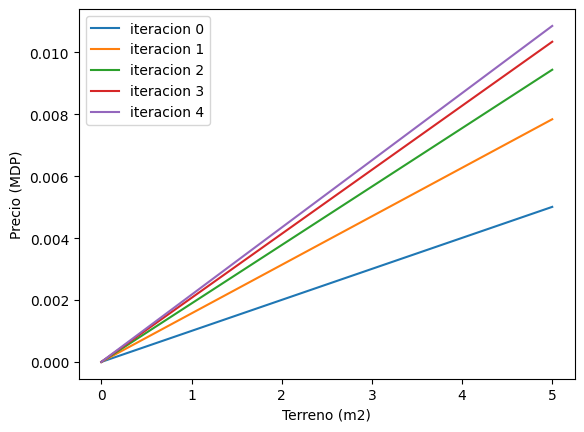

In [7]:
# Graficamos las iteraciones y_pred
line_space = np.linspace(0, 5, 10)
for i in range(len(y_pred)):
    plt.plot(line_space, (ws[i] * line_space), label=f'iteracion {i}')
    plt.xlabel('Terreno (m2)')
    plt.ylabel('Precio (MDP)')
    plt.legend()
plt.show()

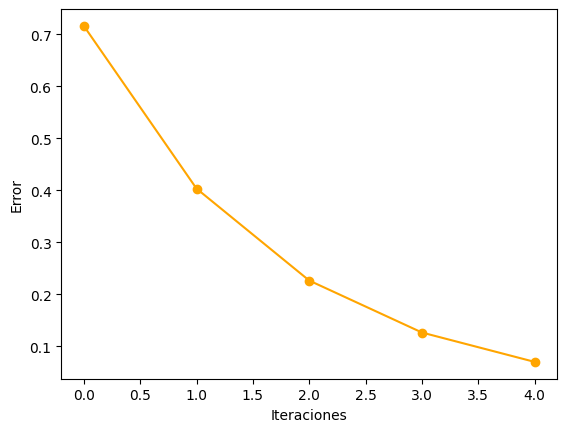

In [13]:
# Graficamos los puntos del error
plt.plot(range(len(error)), error, 'o-', color='orange')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.show()